In [18]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import pandas as pd


In [19]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

### Splitting and loading of dataset

In [20]:
# MNIST dataset (images and labels)
import torchvision.transforms as transforms
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [21]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [22]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [23]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

### Defining the model

In [24]:
import torch.nn as nn

input_size = 28*28
num_classes = 10      #no og outputs

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [25]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0012, -0.0094, -0.0136,  ..., -0.0072, -0.0175, -0.0201],
        [-0.0267,  0.0153,  0.0161,  ..., -0.0237,  0.0082,  0.0335],
        [ 0.0144, -0.0251, -0.0050,  ...,  0.0332,  0.0025,  0.0293],
        ...,
        [-0.0095,  0.0271,  0.0169,  ...,  0.0144,  0.0345,  0.0050],
        [-0.0166, -0.0257,  0.0330,  ...,  0.0038,  0.0155,  0.0055],
        [ 0.0249, -0.0230,  0.0221,  ..., -0.0122, -0.0303, -0.0039]],
       requires_grad=True)

In [26]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0327, -0.0137,  0.0268, -0.0220, -0.0212,  0.0222,  0.0003,  0.0091,
         0.0137,  0.0048], requires_grad=True)

In [27]:
for images, labels in train_loader:
    # Flatten the input images
    images = images.view(images.size(0), -1)
    
    # Print the labels of the current batch
    print(labels)
    
    # Print the shape of the current batch of images
    print(images.shape)
    
    # Pass the batch of images through the model to get outputs
    outputs = model(images)
    
    # Print the outputs
    print(outputs)
    
    # Break the loop after processing the first batch
    break


tensor([9, 2, 9, 1, 7, 3, 8, 9, 6, 6, 0, 6, 2, 4, 3, 3, 8, 9, 0, 2, 8, 9, 3, 4,
        1, 3, 6, 4, 3, 6, 1, 7, 6, 1, 9, 7, 1, 2, 7, 3, 1, 4, 7, 6, 3, 5, 2, 5,
        8, 8, 6, 3, 3, 3, 0, 8, 9, 3, 8, 2, 9, 4, 1, 6, 8, 5, 4, 2, 6, 2, 6, 2,
        1, 7, 8, 7, 9, 2, 7, 1, 6, 7, 7, 3, 9, 0, 7, 3, 0, 0, 5, 0, 2, 3, 8, 9,
        7, 1, 5, 4, 3, 6, 4, 2, 4, 9, 8, 8, 8, 9, 7, 9, 3, 6, 6, 1, 0, 7, 4, 2,
        7, 6, 2, 3, 2, 0, 5, 1])
torch.Size([128, 784])
tensor([[ 0.1292, -0.1470, -0.0162,  ...,  0.0310,  0.1021,  0.3903],
        [-0.1094, -0.1244, -0.2157,  ..., -0.0405,  0.4720, -0.0387],
        [ 0.1389, -0.1189, -0.0691,  ...,  0.1348,  0.2073,  0.2747],
        ...,
        [-0.2384, -0.1600, -0.1846,  ..., -0.1717,  0.3964, -0.0491],
        [-0.1065, -0.1591, -0.0972,  ..., -0.0522,  0.0166,  0.2811],
        [-0.0565, -0.2478,  0.2419,  ...,  0.2340, -0.0605,  0.1283]],
       grad_fn=<AddmmBackward0>)


In [28]:
images.shape

torch.Size([128, 784])

This need to coverted to vectors first

In [29]:
images.reshape(128, 784).shape

torch.Size([128, 784])

In [30]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [31]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [32]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0201, -0.0124,  0.0209,  ..., -0.0076, -0.0060, -0.0354],
         [-0.0040, -0.0037,  0.0168,  ...,  0.0193,  0.0052,  0.0085],
         [ 0.0095, -0.0227, -0.0111,  ...,  0.0250,  0.0079,  0.0203],
         ...,
         [-0.0248,  0.0156,  0.0355,  ..., -0.0069,  0.0277,  0.0153],
         [ 0.0062, -0.0207, -0.0153,  ..., -0.0191, -0.0305, -0.0288],
         [ 0.0159,  0.0257, -0.0033,  ...,  0.0226,  0.0300,  0.0225]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0192,  0.0278,  0.0100, -0.0122, -0.0190,  0.0220,  0.0197, -0.0171,
          0.0039,  0.0322], requires_grad=True)]

In [33]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1294,  0.0294, -0.1810,  0.0843, -0.1909,  0.1694,  0.1028,  0.0008,
         -0.2635,  0.1137],
        [-0.1550,  0.0138,  0.2591, -0.0410, -0.3513,  0.0192, -0.0192,  0.0389,
         -0.0534,  0.0140]])


In [34]:
import torch.nn.functional as F
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1127, 0.1020, 0.0826, 0.1077, 0.0818, 0.1173, 0.1097, 0.0991, 0.0761,
         0.1109],
        [0.0871, 0.1031, 0.1318, 0.0976, 0.0716, 0.1037, 0.0998, 0.1058, 0.0964,
         0.1031]])
Sum:  1.0


In [35]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([5, 2, 2, 5, 6, 9, 5, 5, 6, 5, 5, 5, 6, 0, 0, 2, 9, 3, 8, 9, 2, 6, 8, 0,
        8, 5, 5, 2, 5, 5, 3, 2, 2, 2, 3, 5, 2, 1, 6, 6, 9, 2, 2, 5, 9, 5, 6, 2,
        6, 2, 2, 2, 5, 1, 1, 9, 9, 6, 2, 6, 6, 0, 9, 9, 6, 6, 6, 6, 5, 2, 8, 5,
        2, 5, 5, 5, 5, 9, 5, 8, 0, 3, 5, 8, 2, 5, 8, 9, 9, 5, 2, 7, 5, 6, 5, 2,
        0, 6, 9, 2, 6, 5, 0, 9, 5, 0, 2, 9, 6, 6, 6, 6, 3, 2, 5, 9, 6, 2, 6, 5,
        8, 5, 2, 2, 5, 6, 1, 2])
tensor([0.1173, 0.1318, 0.1247, 0.1418, 0.1167, 0.1499, 0.1687, 0.1120, 0.1377,
        0.1283, 0.1434, 0.1288, 0.1242, 0.1204, 0.1201, 0.1306, 0.1366, 0.1267,
        0.1193, 0.1390, 0.1429, 0.1280, 0.1350, 0.1244, 0.1310, 0.1189, 0.1485,
        0.1270, 0.1316, 0.1633, 0.1294, 0.1364, 0.1256, 0.1330, 0.1155, 0.1361,
        0.1391, 0.1111, 0.1304, 0.1264, 0.1142, 0.1135, 0.1122, 0.1395, 0.1195,
        0.1218, 0.1229, 0.1177, 0.1364, 0.1315, 0.1390, 0.1191, 0.1395, 0.1272,
        0.1247, 0.1193, 0.1245, 0.1306, 0.1273, 0.1266, 0.1238, 0.1185, 0.1393,
       

In [36]:
labels

tensor([8, 1, 1, 8, 7, 4, 0, 7, 4, 0, 2, 0, 9, 4, 3, 6, 0, 4, 5, 0, 1, 3, 4, 5,
        5, 9, 0, 1, 2, 0, 8, 1, 6, 7, 6, 9, 4, 7, 4, 9, 8, 7, 9, 8, 9, 8, 9, 1,
        2, 7, 5, 8, 0, 6, 4, 0, 9, 7, 3, 0, 5, 7, 0, 6, 7, 5, 9, 7, 0, 8, 9, 8,
        6, 0, 6, 8, 6, 4, 4, 2, 8, 6, 0, 3, 1, 2, 9, 3, 5, 0, 8, 2, 3, 9, 8, 1,
        7, 4, 2, 1, 4, 0, 2, 2, 0, 4, 1, 2, 1, 2, 5, 9, 6, 1, 5, 3, 1, 8, 9, 8,
        3, 6, 7, 3, 5, 3, 5, 7])

In [37]:
#evaluation metric
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [38]:
accuracy(outputs, labels)

tensor(0.0312)

In [39]:
#loss function
loss_fn = F.cross_entropy
#cross-entropy is the negative logarithm of the
#predicted probability of the correct label averaged over all training samples.

In [40]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3098, grad_fn=<NllLossBackward0>)


### Training

In [41]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase        #This is strictly for evaluation as we have to see how well model is generalised od sep dataset
        #we can detect the signs of overfitting
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [42]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [43]:
#redefining the model
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [44]:
result0 = evaluate(model, val_loader)
result0
#The initial accuracy is around 7%, which one might expect from a randomly
#initialized model (since it has a 1 in 7 chance of getting a label right
#by guessing randomly).



{'val_loss': 2.2927916049957275, 'val_acc': 0.14181171357631683}

In [45]:
history1 = fit(5, 0.001, model, train_loader, val_loader)
#With just 5 epochs of training, our model has reached an accuracy of
#over 80% on the validation set

Epoch [0], val_loss: 1.9312, val_acc: 0.6810
Epoch [1], val_loss: 1.6650, val_acc: 0.7515
Epoch [2], val_loss: 1.4664, val_acc: 0.7761
Epoch [3], val_loss: 1.3165, val_acc: 0.7900
Epoch [4], val_loss: 1.2015, val_acc: 0.8012


In [46]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1114, val_acc: 0.8100
Epoch [1], val_loss: 1.0391, val_acc: 0.8170
Epoch [2], val_loss: 0.9802, val_acc: 0.8234
Epoch [3], val_loss: 0.9311, val_acc: 0.8268
Epoch [4], val_loss: 0.8897, val_acc: 0.8298


In [47]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8542, val_acc: 0.8329
Epoch [1], val_loss: 0.8235, val_acc: 0.8360
Epoch [2], val_loss: 0.7966, val_acc: 0.8393
Epoch [3], val_loss: 0.7729, val_acc: 0.8424
Epoch [4], val_loss: 0.7518, val_acc: 0.8436


In [48]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7328, val_acc: 0.8446
Epoch [1], val_loss: 0.7157, val_acc: 0.8467
Epoch [2], val_loss: 0.7002, val_acc: 0.8483
Epoch [3], val_loss: 0.6860, val_acc: 0.8503
Epoch [4], val_loss: 0.6730, val_acc: 0.8516


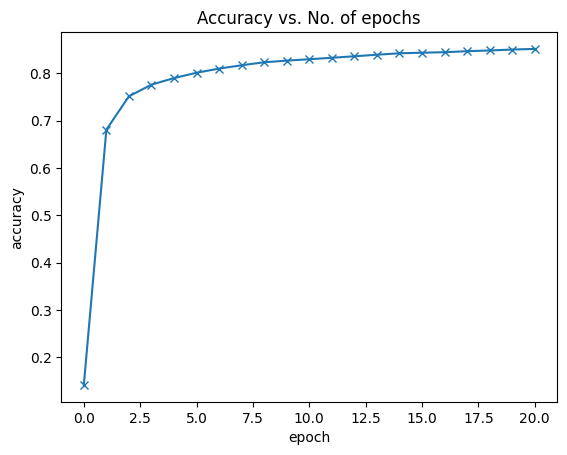

In [49]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [50]:
# Open a file in write mode
with open('logs.txt', 'w') as f:
    # Write the logs to the file
    f.write("Validation Accuracy: {}\n".format(history[-1]['val_acc']))
    f.write("Validation Loss: {}\n".format(history[-1]['val_loss']))


In [51]:
#!pip install pandas openpyxl

In [53]:
# Create a DataFrame with the logs
logs_df = pd.DataFrame({'Validation Accuracy': [history[-1]['val_acc']],
                        'Validation Loss': [history[-1]['val_loss']]})

# Save DataFrame to an Excel file
logs_df.to_excel('logs.xlsx', index=False)


## Testing with single images

In [56]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


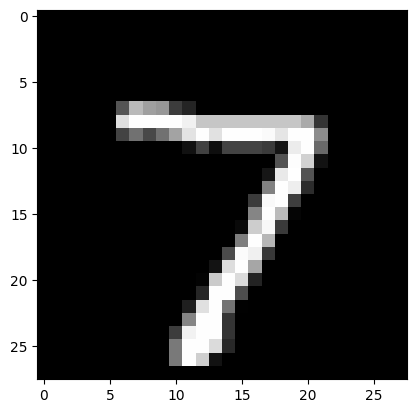

In [57]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [58]:
def predict_image(img, model):
    xb = img.unsqueeze(0) #since model works with batch data but we r using single images, we have to
    #convert into batches
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

In [59]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

Label: 7 , Predicted: 7


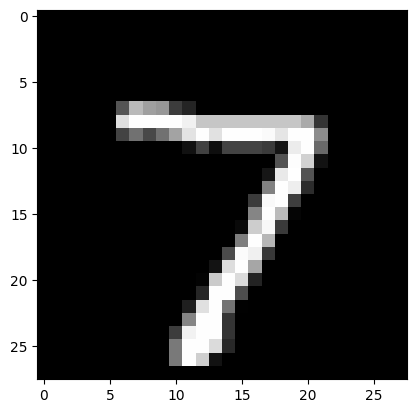

In [60]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


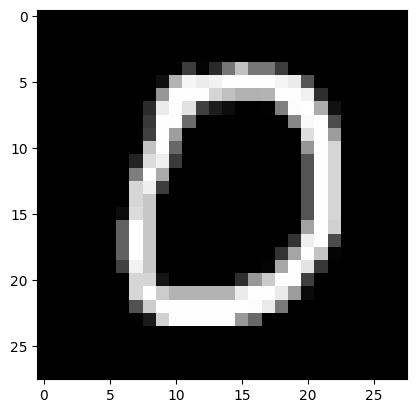

In [61]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


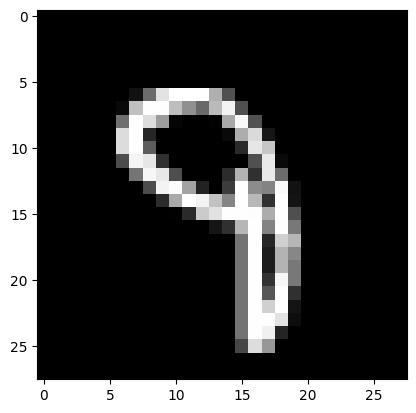

In [62]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


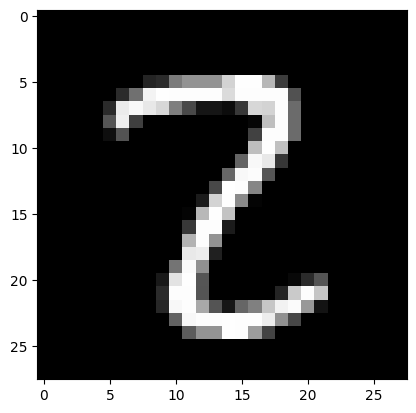

In [63]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

##### Identifying where our model performs poorly can help us improve the model, by collecting more training data, increasing/decreasing the complexity of the model, and changing the hypeparameters.
##### As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [64]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result
#if test_acc<val_acc, then u have bad val set

{'val_loss': 0.637276828289032, 'val_acc': 0.859179675579071}

### Let's save our weights to disk

In [65]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [66]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0175,  0.0339,  0.0274,  ..., -0.0288, -0.0144, -0.0061],
                      [-0.0133, -0.0131,  0.0069,  ..., -0.0280, -0.0142,  0.0156],
                      [-0.0212,  0.0261,  0.0258,  ...,  0.0321, -0.0190,  0.0133],
                      ...,
                      [-0.0290, -0.0081, -0.0064,  ...,  0.0202,  0.0180,  0.0280],
                      [ 0.0032,  0.0165,  0.0030,  ..., -0.0289, -0.0330,  0.0074],
                      [ 0.0233, -0.0315, -0.0042,  ..., -0.0010,  0.0168,  0.0107]])),
             ('linear.bias',
              tensor([-0.0090,  0.1147, -0.0587, -0.0398,  0.0093,  0.0075, -0.0092,  0.0382,
                      -0.1229, -0.0326]))])

In [67]:
model2 = MnistModel()

In [68]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0237,  0.0136, -0.0127,  ..., -0.0098, -0.0099,  0.0205],
                      [ 0.0051,  0.0137, -0.0316,  ..., -0.0120,  0.0220,  0.0230],
                      [-0.0275,  0.0094,  0.0078,  ..., -0.0047,  0.0038, -0.0176],
                      ...,
                      [-0.0092,  0.0318,  0.0037,  ...,  0.0098,  0.0307,  0.0143],
                      [-0.0012, -0.0143, -0.0059,  ..., -0.0159, -0.0140, -0.0300],
                      [ 0.0166, -0.0189, -0.0238,  ..., -0.0122,  0.0101,  0.0249]])),
             ('linear.bias',
              tensor([-0.0288,  0.0040,  0.0012, -0.0118,  0.0129, -0.0133, -0.0259, -0.0058,
                       0.0233,  0.0175]))])

In [69]:
evaluate(model2, test_loader)

{'val_loss': 2.2995707988739014, 'val_acc': 0.0888671875}

### As u can see it is giving bad accuracy since we haven't used updated weights for it.

In [70]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0175,  0.0339,  0.0274,  ..., -0.0288, -0.0144, -0.0061],
                      [-0.0133, -0.0131,  0.0069,  ..., -0.0280, -0.0142,  0.0156],
                      [-0.0212,  0.0261,  0.0258,  ...,  0.0321, -0.0190,  0.0133],
                      ...,
                      [-0.0290, -0.0081, -0.0064,  ...,  0.0202,  0.0180,  0.0280],
                      [ 0.0032,  0.0165,  0.0030,  ..., -0.0289, -0.0330,  0.0074],
                      [ 0.0233, -0.0315, -0.0042,  ..., -0.0010,  0.0168,  0.0107]])),
             ('linear.bias',
              tensor([-0.0090,  0.1147, -0.0587, -0.0398,  0.0093,  0.0075, -0.0092,  0.0382,
                      -0.1229, -0.0326]))])

In [71]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.637276828289032, 'val_acc': 0.859179675579071}

### Here we have good accuracy

In [72]:
# Save the model
torch.save(model.state_dict(), 'mnist-logistic.pth')
